In [1]:
#Libraries and functions used for math operations and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#This model is based on sklearn library, here's needed dependencies
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn import model_selection, linear_model, metrics, datasets
from sklearn.linear_model import LinearRegression

#Sklearn model for Ridge regression that is used to determine hyperparameter alpha
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#Data url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import OrdinalEncoder

In [2]:
names = ['Sex',
        'Length ',
        'Diameter ',
        'Height ',
        'Whole weight',
        'Shucked weight',
        'Viscera weight',
        'Shell weight',
        'Rings ']


Names array contains column names that will serve as model variables.
Because model needs to predict age but age data is not given in table, it can be calculated from Rings column(age of the abalone is proportional to the number of rings,that is known from biology), so the rings column will be used as output.All other variables will be examined in order to find how they affect y.

Below is complete mashine learning model based on Linear Regression,
with performance and error calculations.

Then KNN method will be used to calculate seashells age and results will be compared.


In [3]:
#Data is loaded and saved to local csv file
data = pd.read_csv(url, names=names)
data.to_csv('AbaloneData.csv', index = False)

#Data is merged to y(Rings) and x variables(all other variables)
data_x =pd.read_csv('AbaloneData.csv', usecols=[0,1,2,3,4,5,6,7])
data_y = pd.read_csv('AbaloneData.csv', usecols=[8])

#Encoding sex column, coding values as numbers
enc = OrdinalEncoder()
enc.fit(data_x[["Sex"]])
data_x[["Sex"]] = enc.transform(data_x[["Sex"]])


#Data needs to be split into train-validation-test proportion 70-10-20
#At first, train data and test data are split in 70-30 proportion,
#then test data and validatio data are split in proportion 20-10
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=0)
x_validation, x_test, y_validation, y_test= train_test_split(x_test, y_test, test_size=2/3, random_state=0)

      Sex
0     2.0
1     2.0
2     0.0
3     2.0
4     1.0
...   ...
4172  0.0
4173  2.0
4174  2.0
4175  0.0
4176  2.0

[4177 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


Train set(x_train,y_train) will be used for training Linear Regression model, it will be tested with test set(x_test,y_test).
Before training, hyperparameters needs to be evaluated in order to find their optimum value, it is done using x_validate and y_validate.

In [4]:
#Ridge regression model is used for validation
#Before determining best possible coefficient(here's just one, alpha),
#validation data needs to be scaled(zero mean and unit variance)
scaler = StandardScaler()
x_std = scaler.fit_transform(x_validation)

#It will return alpha value that determines best model
regr_cv = RidgeCV(alphas=[0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,
2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,13])
 
model_cv = regr_cv.fit(x_std, y_validation)
print("Optimal alpha is:",model_cv.alpha_)
# It turns out that the optimal alpha has value of 3.5

#Linear regression is usualy done using Lasso and Ridge models
#Lasso tends to do well if there are a small number of significant parameters and the 
#others are close to zero (ergo: when only a few predictors actually influence the response)
#Lasso uses l1 regularization
#Ridge gives better results when there is more data to process(which is the case),so it is used here
#Ridge uses l2 regularization
ridge = Ridge(alpha=3.5).fit(x_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(x_test, y_test)))

Optimal alpha is: 3.5
Training set score: 0.51
Test set score: 0.52


In [5]:
#Scaling

scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_valid_scaled = scaler.transform(x_validation)

lr = Ridge(alpha=3.5).fit(x_train_scaled, y_train)
y_pred = lr.predict(x_test_scaled)

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 4.455911737548144


When optimal hyperparameters are determined, model needs to be trained

In [6]:
#Training functionn call, model is trained with x_train and y_train
#lr = LinearRegression().fit(x_train, y_train)
lr = Ridge(alpha=3.5).fit(x_train, y_train)

#When training is over, it can estimate y for x_test and compare it with
#y_test to see correlation

#10 random samples
y_pred = lr.predict(x_test)
print("   Predicted Rings\n\n",y_pred[:10])
print("\n", y_test[:10])


   Predicted Rings

 [[11.91703736]
 [ 6.56040857]
 [ 8.78699405]
 [ 8.6082368 ]
 [ 9.20793214]
 [11.08226357]
 [11.15866638]
 [12.25184475]
 [ 9.98105924]
 [10.21332058]]

       Rings 
1399      11
2714       5
2310      13
965        8
1343      10
1675       7
3232      13
3851      10
639       13
1363      10


Corelations between rings and all other variables are plotted.

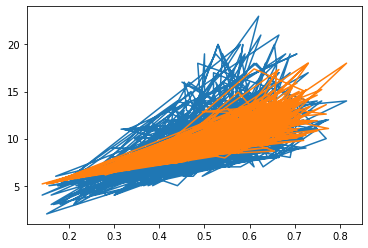

In [7]:
plt.plot(x_test['Length '],y_test)

plt.plot(x_test['Length '],y_pred)

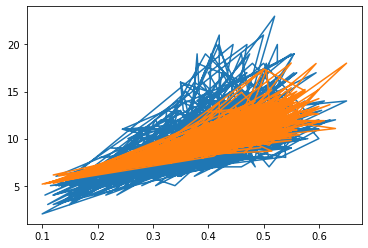

In [8]:
plt.plot(x_test['Diameter '],y_test)

plt.plot(x_test['Diameter '],y_pred)

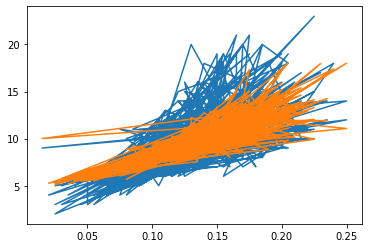

In [9]:
plt.plot(x_test['Height '],y_test)

plt.plot(x_test['Height '],y_pred)

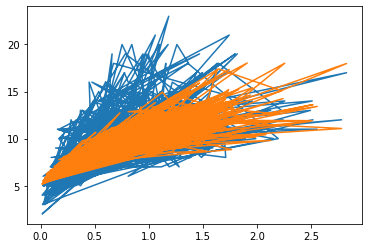

In [10]:
plt.plot(x_test['Whole weight'],y_test)

plt.plot(x_test['Whole weight'],y_pred)

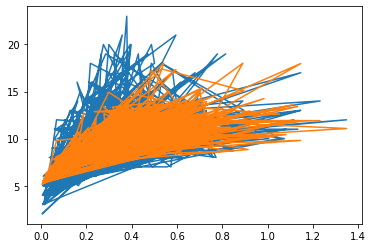

In [11]:
plt.plot(x_test['Shucked weight'],y_test)

plt.plot(x_test['Shucked weight'],y_pred)

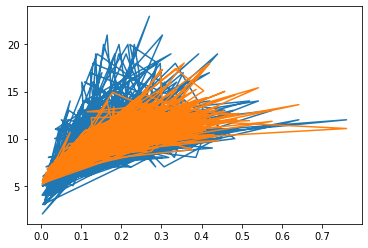

In [12]:
plt.plot(x_test['Viscera weight'],y_test)

plt.plot(x_test['Viscera weight'],y_pred)

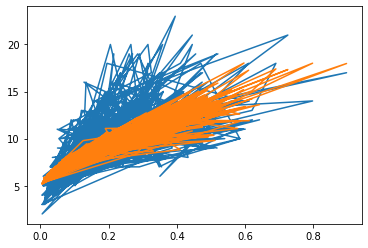

In [13]:
plt.plot(x_test['Shell weight'],y_test)

plt.plot(x_test['Shell weight'],y_pred)

In [14]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 4.627869557911727


In [16]:
#Normalization

x_normalized = preprocessing.normalize(x_train, norm='l2',axis=0)

xt_normalized = preprocessing.normalize(x_test, norm='l2',axis=0)



#Converting x_normalized and xt_normalized to Dataframe data type
dx = pd.DataFrame(x_normalized, columns = ['Sex','Length ',
                'Diameter ',
                'Height ',
                'Whole weight',
                'Shucked weight',
                'Viscera weight',
                'Shell weight'])

dxt = pd.DataFrame(xt_normalized, columns = ['Sex','Length ',
                'Diameter ',
                'Height ',
                'Whole weight',
                'Shucked weight',
                'Viscera weight',
                'Shell weight'])



#Training functionn call, model is trained with x_train and y_train
lr = Ridge(alpha=3.5).fit(dx, y_train)


#When training is over, it can estimate y for x_test and compare it with
#y_test to see if they match

#10 random samples
y_pred = lr.predict(dxt)
print("   Predicted Rings\n\n",y_pred[:10])
print("\n", y_test[:10])


   Predicted Rings

 [[11.41635573]
 [ 9.44977506]
 [10.07506767]
 [10.59932054]
 [11.21634542]
 [11.54899068]
 [10.64647369]
 [10.79638499]
 [10.43502082]
 [10.87946233]]

       Rings 
1399      11
2714       5
2310      13
965        8
1343      10
1675       7
3232      13
3851      10
639       13
1363      10


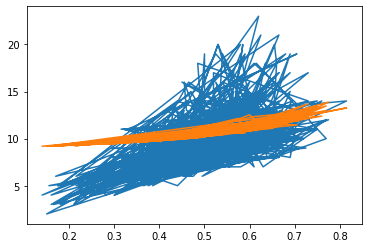

In [17]:
plt.plot(x_test['Length '],y_test)

plt.plot(x_test['Length '],y_pred)

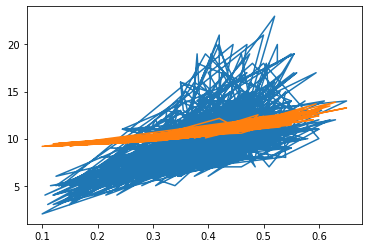

In [18]:
plt.plot(x_test['Diameter '],y_test)

plt.plot(x_test['Diameter '],y_pred)

In [19]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 8.15667859779828


Mean Squared Error is higher, that means that normalization affects results in negative way.
That means that distribution isnt similar to Gausian distribution, there's no help from normalization.









# KNN Analyses

Data is split in three parts(train, test, validation) by calling traint_test_split function two times.
After that, data is scaled before it is set to regression function
(KNeighborsRegressor).


In [20]:
#Train and test set are split so that the test set takes 20% of train set(whole data)
#After that, train and validation sets are split so that validation takes 1/8 of reamining data(10% of whole data)

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=1/8)

#Scaling the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_valid_scaled = scaler.transform(X_valid)



Here's the for loop that evaluates mean error for various values of K(goes from one to 100) and puts it into error[ ] array that is used for plotting.

Text(0, 0.5, 'Mean Error')

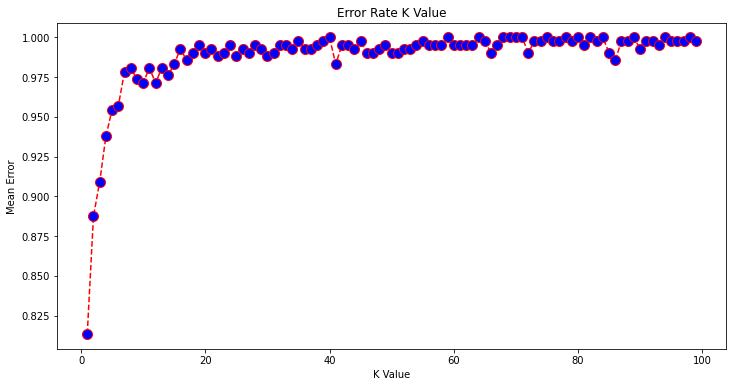

In [21]:

#Here's stored mean error(predicted value and y_validation is substracted,
# mean is taken from that) for various values of K
error = []

# Calculating error for K values between 1 and 100
for i in range(1, 100):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_valid_scaled)
    error.append(np.mean(pred_i != y_valid))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


From graph, obviously mean error is smallest for K=1, so that value will be used for KNRegression.

In [22]:
knn = KNeighborsRegressor(n_neighbors=1) # K=1
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)

You can put here more graphs like it is done on lines 7-13, but one is enough. From graph, it can be said that results are pretty similar to 
raw linear regression.

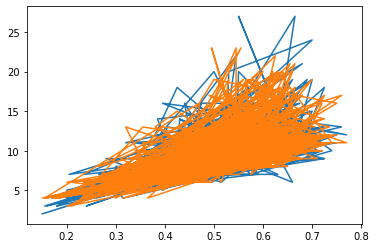

In [23]:
plt.plot(X_test['Length '],y_test)

plt.plot(X_test['Length '],pred)

In [24]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))

Mean Squared Error: 9.180622009569378


Mean Squared Error is higher than at pure linear regression, due to different algorithm used for learning.
It can be said that linear regrresion gives better results if data is scaled.

Down below same procedure is done when data is normalized.

In [25]:
X_normalized = preprocessing.normalize(X_train, norm='l2',axis=0)

Xt_normalized = preprocessing.normalize(X_test, norm='l2',axis=0)


knn = KNeighborsRegressor(n_neighbors=1) # K=1
knn.fit(X_normalized, y_train)
pred = knn.predict(Xt_normalized)



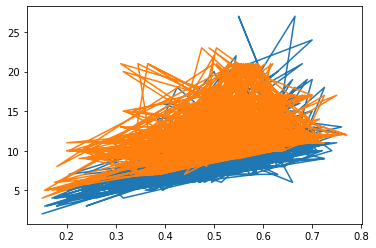

In [26]:
plt.plot(X_test['Length '],y_test)

plt.plot(X_test['Length '],pred)

In [27]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))

Mean Squared Error: 18.948564593301434


In both cases of data preporcessing(scaling and normalization), pure linear regression gives better results from viewpoint of mean squared error. Data from graphics confirms it, showing much wider, unstable curves on knn regression(both parameters are set to optimal value)